## Soil, Water and Atmospheric Processes  
## Tutorial 2 - Evaporation  
<img style="float: right;" src="images/UoE_Logo.png" alt="UoE" height="50px" width="350px"/>  
<img style="float: left;" src="images/kansas.png" alt="UoE" height="50px" width="1050px"/>

In [4]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [5]:
# Initial set-up
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import HTML, display
from src.pminterface import pminterface
from src import Model, View
print ("You are now ready to continue the practical")

You are now ready to continue the practical


## INTRODUCTION  
This tutorial will help reinforce some of the lecture material on water vapour, evaporation and turbulent transfer processes. You will use a simulation model of the evaporation process (essentially the Penman-Monteith equation we covered in Lectures 8 & 9) to answer a small number of questions.  By doing so, you should begin to appreciate how sensitive the evaporation process is to its driving parameters e.g. solar radiation, vapour pressure gradient, atmospheric turbulence and vegetation-related factors. 

Your answers to the questions form part of the continuous assessment for this course and this is a summative assessment. You will be given access to a digital worksheet on Learn to record your answers and **you should complete the interactive worksheet on Learn by the date shown in the Course Handbook**. We give you a draft worksheet at the end of this document but copy your answers over to the Learn version for submission and assessment. 
 

## About the Penman-Monteith model
In lecture 9, we discussed the advance that Monteith made to the Penman equation when he introduced resistances to water vapor transport that were associated with the vegetation. You can think of resistances in an analogous form to Ohm’s Law – for a given potential difference (voltage), current will flow at a rate determined by the electrical resistance of the circuit ($I=V/R$). The aerodynamic roughness of the vegetation will influence the ease with which water vapour can be removed from leaves, hence the ‘surface roughness term’, which Monteith introduced. The aerodynamic resistance ($r_a$) is a function of wind speed and roughness length as we discussed in the last lecture. The taller and rougher the vegetation, the smaller will be $r_a$ (all else being equal). See Oke (1987) Boundary Layer Climates, page 70 for more details.

It was recognized in the 1960’s that plants were not merely ‘passive wicks’ in the evaporation process but were able to control their loss of water to some extent by opening and closing their stoma. The degree of closure of the stomatal aperture can be a function of solar radiation, internal $CO_2$ concentration, soil water availability and other factors as discussed in the lecture. The P-M equation treats canopies comprised of individual leaves as one big leaf with canopy (or bulk surface) resistance (rs) being a measure of stomatal movement. In this simplified version of the evaporation process, bulk surface resistance is determined by the soil moisture deficit as we discussed in the lecture. Liquid water sitting on the surface of leaves, of course, is readily available for evaporation and wet leaves in the model are given a surface resistance of 0.

## Penman-Monteith Equation
<br>
$ \Large LE = \frac{\Delta R_n + \frac{\rho c_p (e_z - e_s)}{r_a}}{\Delta + \gamma(1+\frac{r_c}{r_a})}$
<br>  
where:  
<br>
$\large LE $ = evaporation rate (here in W m$^{-2}$ but could be mm hour^$-1$ also)
<br>
$\large R_n$ = net radiation (W m$^{-2}$)
<br>
$\large \Delta$ = slope of saturation vapor pressure curve (hPa$\, ^{\circ}$C$^{-1}$)
<br>
$\large \rho$ = density of air (kg m$^{-3}$)
<br>
$\large c_p$ = specific heat of air (j kg$^{-1}$ $^{\circ}$C$^{-1}$)
<br>
$\large e_z$ = vapour pressure in air (hPa) at height $z$
<br>
$\large e_s$ = vapour pressure at surface (hPa)
<br>
$\large r_a$ = aerodynamic resistance (s m$^{-1}$)
<br>
$\large r_c$ = canopy resistance or bulk stomatal resistance (s m$^{-1}$)
<br>
$\large \gamma$ = pyschrometric constant (0.066 hPa $^{\circ}$C$^{-1}$)
<br>

In the version of the P-M model we use here, the soil moisture deficit is used to determine the value of the bulk surface resistance ($r_c$ also sometimes called the canopy resistance) for a particular land surface type. The aerodynamic resistance ($r_a$) is controlled by the value of wind speed you choose. You should recognise the following two figures from the lecture - the UK Met Office produce an estimate of SMD across the country as a service to farmers, builders, insurance companies etc using a slightly more sophisticated version of the model we use here (taking into account seasonal differences in vegetation height leaf area index and albedo for instance); this figure shows the varialbility across the UK in August 2018 and you could use this as a basis for determining how evaporation rates for the same crop type would vary by region acrosss the country. The second figure shows an experiment (by Dr Graham Russell who used to teach on an earlier version of SWAP at Edinburgh!) in which $r_c$ was determined as a function of SMD - and this relationship is assumed to hold for a number of different plant and tree species (but with different minimum values of $R_c$). When you change the SMD in the model below, an equation predicts $r_c$ and feeds that back into the model calculation of evaporation rate.  

<img style="float: left;" src="images/MORECS_SMD_Aug_2018.png" alt="UoE" height="50px" width="400px"/>
<img style="float: right;" src="images/Surface_resistance_cereals.png" alt="UoE" height="50px" width="400px"/>

Scenes like this (a field of wheat in central England in Aug 2018) were common across the country.</br>
<img style="float: left;" src="images/drought_wheat.png" alt="UoE" height="50px" width="450px"/>

The Met Office scheme known as MORECS takes into account quite a range of land surface covers and the model is parameterised for each of these land surfaces - see the Table below. In their model, they also allow for a 40 km grid square to have several different types of land cover in the one square.  For our purposes today, we'll assume the calculation of evaporation is typical of *an hourly average in mid- to late summer in the UK*.  

| Surface type | Albedo   | Height (m) | Minimum $r_c$($s \ m ^{-1}$) |
|--------------|----------|------------|----------------------------|
| Grass        | 0.25     | 0.15       | 40                         |
| Cereals      | 0.25     | 0.05-0.8   | 40                         |
| Potatoes     | 0.25     | 0.05-0.6   | 40                         |
| Sugar beet   | 0.25     | 0.05-0.35  | 40                         |
| Oilseed rape | 0.25     | 0.05-0.35  | 40                         |
| Conifers     | 0.12     | 10         | 70                         |
| Deciduous    | 0.12     | 2 - 10     | 80                         |
| Upland       | 0.25     | 0.15       | 110                        |
| Orchards     | 0.25     | 0.15-0.30  | 40-80                      |
| Bare soil    | 0.05-0.3 | 0.05       | 100                        |
| Water        | 0.05     | 0.005      | 0                          |

<div class="alert alert-block alert-info">
<b>The start of the model interface:</b> All of the above cells were background information just reminding you what we covered in a couple of the lectures. The cells below are what you need to use to run the model. The model is written in python and I've chosen not to display all the source code in this notebook so as not to detract from the exercise itself. If you want to look at the code just go back to the file manager and look in the folder labelled `src`.
</div>

<IPython.core.display.Javascript object>


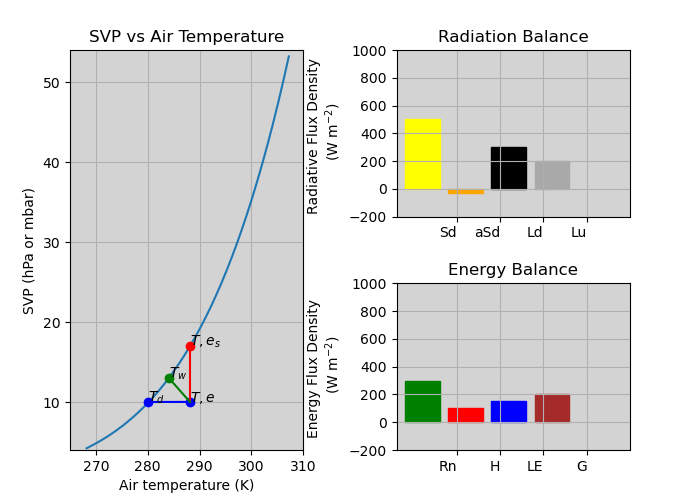

In [6]:
fd = pminterface()                                  # Create some selection boxes
mod = Model.Model(fd.inpt)                          # Create the Model
widgets.VBox(children=[fd.h0,fd.h1,fd.h2,fd.h3])    # Display the weather options

I've also plotted the energy and radiation balance equation for you so you can see how these terms change as a function of the driving variables eg wind speed, irradiance etc. Its instructive also to look at the figure on the left showing the relationship between saturation vapour presure and air temperature; the figure also shows how an air parcel with coordinates (T,e) can be brought to saturation by cooling to the dew-point ($T_d$) or cooling by evaporation to the wet-bulb temperature ($T_w$).  

$\Large R_n=(1-\alpha)Q_t + L_w^{\downarrow} \,+L_w^{\uparrow} = H + LE + G$

## Some things to note about the model.

1.	When you change the air temperature (**air T**) or **vp** above, the Relative Humidity (RH) value will change too **BUT** – it can never be allowed to exceed 100% (the simulation checks for this and the results will not change if RH> about 99.9%).
2.	The questions on the worksheet are just a start - you should make use of such simulation models to perform your own ‘what if?’ experiments. You can gain greater understanding of the subject by just ‘playing around’ with such models.
3.	 Extra marks are available (in question 6) if you show initiative in your analysis or bring in results/conclusions from wider reading.
4.	The evaporation values should be thought of as hourly averages for a late summer day eg late July or August – that is determined by the minimum value of bulk surface resistance and crop/forest height used in this model. In the full MORECS scheme, additional calculations are made depending on season.


<div class="alert alert-block alert-warning">
<b>Sample worksheet questions:</b> The questions below are from the worksheet - use them as a guide here to run the simulations but you must copy your answers to the editable pdf on Learn and submit via Turnitin by the due date. That includes the two Tables for Q1 and Q4.  50 marks are available for this assessement and you can see how many of the marks are available for each question by the number in square brackets at the end of each question.
</div>

**Q1**	Use the model to determine the evapotranspiration rate for both dry and wet (i.e. just after rain) surfaces using the default meteorological conditions. Wet surfaces have an $r_c$ of 0. *Fill in the gaps in the Table on the worksheet*. Some values have been pre-calculated - you should be able to re-create these results to convince yourself that you are using the model correctly.  [8]  
**Q2**	It has been hypothesized that the conversion of a catchment from grassland to coniferous plantation would reduce the discharge rate of the river which drained it and that the mean annual number of days of rain would be an important factor to take into account. What comments do you have on this, bearing in mind the results in the Table in Q1?  [6]  
**Q3**	Studies have shown that for surfaces like grass which are poorly coupled to the atmosphere, the humidity immediately above the canopy is higher than above a rougher canopy such as a coniferous plantation. What effect would this have on evapotranspiration from the two contrasting surfaces? [8]  
**Q4**	The model can be used to examine the sensitivity of wet and dry grassland and wet and dry coniferous forest to solar radiation, humidity, wind speed and temperature. Do this *by filling in the blanks in the Table on the worksheet*. You should record the **difference** in latent heat flux between the maximum and minimum values for each factor in turn (eg high and low air temperature, sunny or dull, dry or humid air, windy or calm) while keeping the other factors constant. You need to keep an eye on the RH value – it can never exceed 100% so you may find when you alter T or vpd that the numeric spinners need not go all the way to the minimum position!).  [6]  
**Q5**	What can you conclude from these estimates? (Start by simply stating what you see – often the best way to approach this sort of task since the conclusions usually fall out from this.)			[12]  
**Q6**	Overall comments on the model or its applicability; what else can it be used for? How accurate do you think it is?  [10]  